In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
col_cat = df.select_dtypes(include = 'object').drop(columns = 'Date')
print(col_cat.columns)

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


In [4]:
col_cat.isna().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [5]:
print('exploration des données catégorielles sans colonne date \n\n')

for col in col_cat:
    print('*********************')
    print('Colonne {col} \n'.format(col = col))

    print('--> na par colonne')
    print(((df[col].isna().sum())/len(df)*100).round(2), '%')

    print('--> nombre de valeur unique')
    print(df[col].nunique(), '\n')

    print('--> valeur unique')
    print(df[col].unique(), '\n')

    print('--> nombre d\'occurence en %')
    print((df[col].value_counts(normalize = True, dropna = False, sort = True)*100).round(2))
    print('****************** \n\n')

exploration des données catégorielles sans colonne date 


*********************
Colonne Location 

--> na par colonne
0.0 %
--> nombre de valeur unique
49 

--> valeur unique
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] 

--> nombre d'occurence en %
Canberra            2.36
Sydney              2.30
Darwin              2.20
Melbourne           2.20
Brisbane            2.20
Adelaide            2.20
Perth               2.20
Hobart              2.20
Albany       

In [6]:
for col in col_cat.columns[0:-1]:
    print('******************* \n\n')
    print(f'--> crosstab avec de RainTomorrow avec {col}')
    print(pd.crosstab(col_cat['RainTomorrow'], col_cat[col], normalize = 'columns'))

******************* 


--> crosstab avec de RainTomorrow avec Location
Location      Adelaide    Albany    Albury  AliceSprings  BadgerysCreek  \
RainTomorrow                                                              
No            0.777346  0.700928  0.794753      0.919499       0.800888   
Yes           0.222654  0.299072  0.205247      0.080501       0.199112   

Location      Ballarat   Bendigo  Brisbane    Cairns  Canberra  ...  \
RainTomorrow                                                    ...   
No            0.742074  0.814766  0.775704  0.682062  0.815974  ...   
Yes           0.257926  0.185234  0.224296  0.317938  0.184026  ...   

Location      Townsville  Tuggeranong     Uluru  WaggaWagga   Walpole  \
RainTomorrow                                                            
No              0.828882      0.81054  0.923734    0.819892  0.663356   
Yes             0.171118      0.18946  0.076266    0.180108  0.336644   

Location      Watsonia  Williamtown  Witchcliffe  

In [7]:
print('seul le crosstab entre raintomorrow et raintoday semble intéressant')
print('s\'il ne pleut pas aujourd\'hui, il y a 85% de chance qu\'il ne pleuve pas demain')
print('s\'il pleut aujourd\'hui, on a un peu moins de 50% de chance qu\'il pleuve demain')

seul le crosstab entre raintomorrow et raintoday semble intéressant
s'il ne pleut pas aujourd'hui, il y a 85% de chance qu'il ne pleuve pas demain
s'il pleut aujourd'hui, on a un peu moins de 50% de chance qu'il pleuve demain


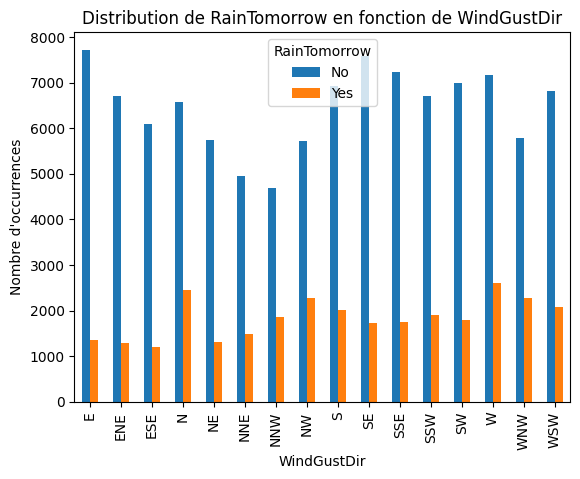

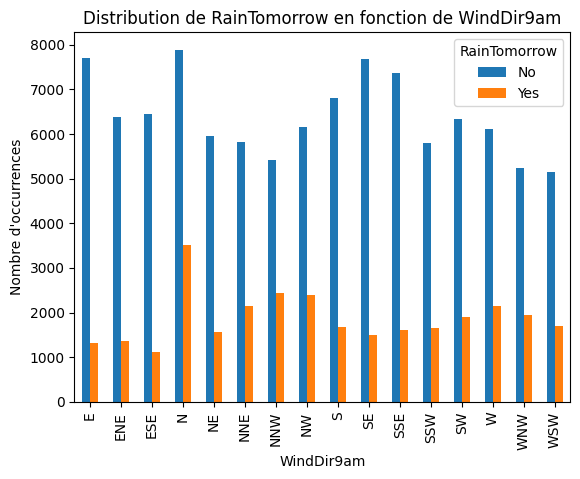

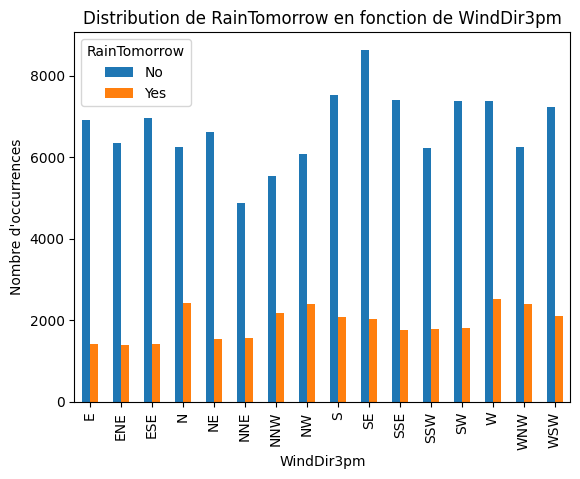

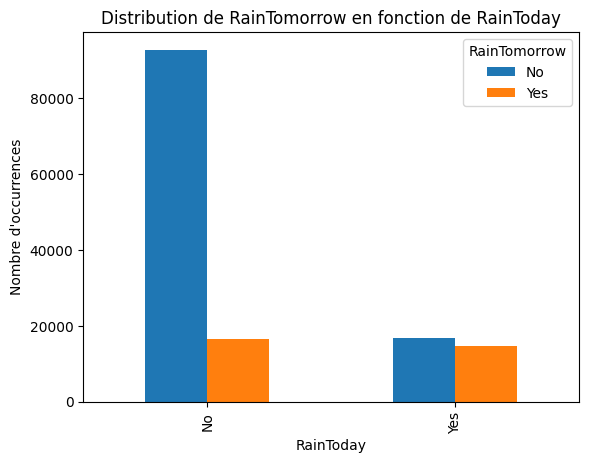

In [8]:
for col in col_cat.columns[1:-1]:
    value_counts = col_cat.groupby(col)['RainTomorrow'].value_counts(normalize=False)
    value_counts = value_counts.unstack().plot(kind='bar', stacked=False)

    plt.title(f'Distribution de RainTomorrow en fonction de {col}')
    plt.xlabel(col)
    plt.ylabel('Nombre d\'occurrences')

    plt.show()


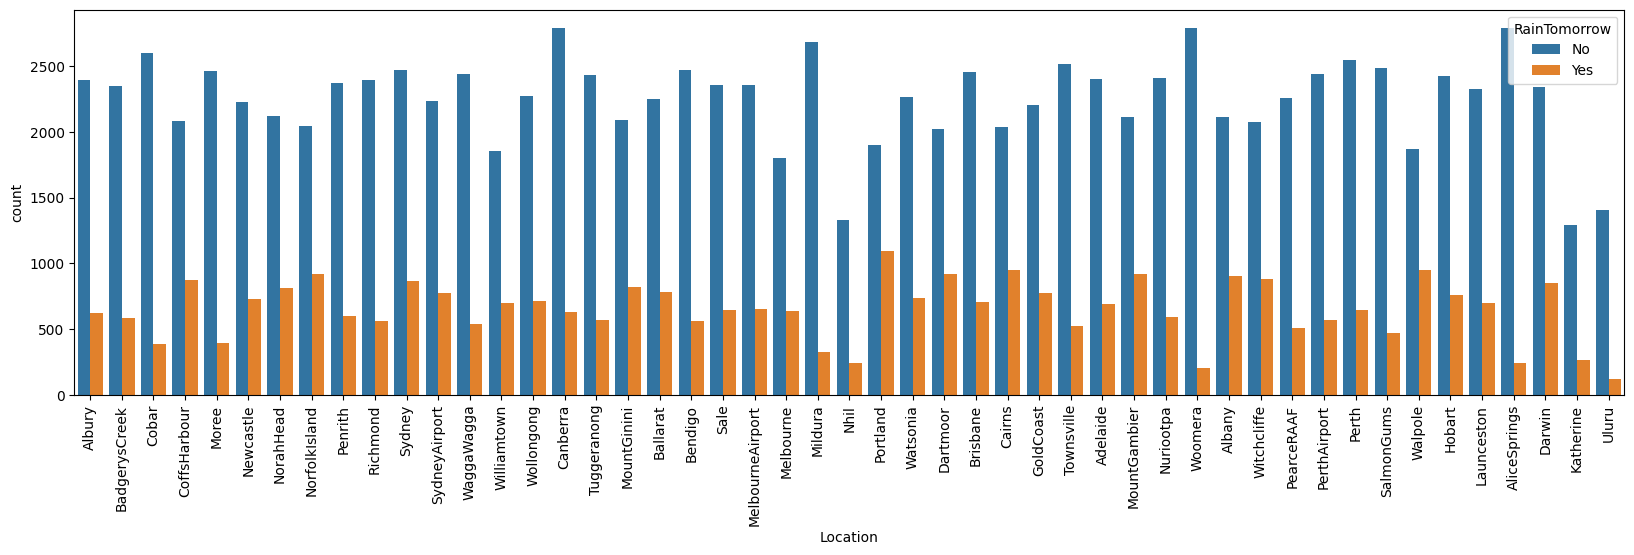

In [9]:
plt.figure(figsize = (20, 5))
sns.countplot(data = df, x = 'Location', hue = 'RainTomorrow')
plt.xticks(rotation = 90)
plt.show()